**The MultiCAPM Model:**


In [0]:
# Load data from the github repository
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import statsmodels.api as sm
import statsmodels
factors_url = 'https://raw.githubusercontent.com/p-ai-org/p-trade/master/factors.CSV'
portfolio_url = 'https://raw.githubusercontent.com/p-ai-org/p-trade/master/portfolios.CSV'
portfolio_df = pd.read_csv(portfolio_url, error_bad_lines=False)
portfolio_df = portfolio_df.drop(0)
factor_df = pd.read_csv(factors_url, error_bad_lines=False)
factor_df = factor_df.iloc[0:1119,:]
factor_df.columns = ['DATE', 'RMRF', 'SMB', 'HML', 'RF']

factor_df['portfolio'] = portfolio_df['Lo 30']
factor_df = factor_df.drop(0)
factor_df = factor_df.drop(1)
factor_df = factor_df.drop(2)
factor_df = factor_df.drop(3)
factor_df = factor_df.drop(4)
# portfolio_df.rename(columns = {'Unnamed: 0': 'DATE'})
# factor_df

In [0]:
# calculate access returns
factor_df['portfolio'].astype(float)
factor_df['access'] = factor_df['portfolio'].astype(float)-factor_df['RF'].astype(float)


In [0]:
# fit the linear regression
lr = LR()
lr.fit(factor_df[['RMRF', 'SMB', 'HML']], factor_df['access'])
print(lr.intercept_)
print(lr.coef_)

# factor_df['access'].rolling(12)

# endog = factor_df['access']
# exog = factor_df[['RMRF', 'SMB', 'HML']]
# rols = RollingOLS(endog, exog, window=12)
# rres = rols.fit()
# params = rres.params
# print(params.head())
# print(params.tail())


#model = pd.stats.ols.MovingOLS(y=factor_df['access'], x=df[['RMRF', 'SMB', 'HML']], 
                               #window_type='rolling', window=12, intercept=True)
#df['prediction'] = model.factor_df
mylist = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(factor_df.access)):
  if i>12:
    lr.fit(factor_df[['RMRF', 'SMB', 'HML']].iloc[i-12:i], factor_df['access'].iloc[i-12:i])
    # print(float(factor_df['RMRF'].iloc[i-11]))
    # print(lr.coef_[0])
    # print(float(factor_df['RMRF'].iloc[i-11])*lr.coef_[0])
    mylist.append(float(factor_df['RMRF'].iloc[i-12])*lr.coef_[0] + float(factor_df['SMB'].iloc[i-12])*lr.coef_[1] + float(factor_df['HML'].iloc[i-12])*lr.coef_[2])
print(len(mylist))
factor_df['predicted_returns'] = mylist
factor_df['predicted_returns']

0.8058492739409782
[0.05701159 0.50788994 0.08485957]
1114


5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
          ...   
1114    3.587191
1115    1.471282
1116    5.860214
1117    3.398216
1118    0.785152
Name: predicted_returns, Length: 1114, dtype: float64

,DATE,RMRF,SMB,HML,RF,portfolio,access,predicted_returns
5,192701,-0.06,-0.56,4.83,0.25,4.15,3.90,0.000000
6,192702,4.18,-0.10,3.17,0.26,1.21,0.95,0.000000
7,192703,0.13,-1.60,-2.67,0.30,6.41,6.11,0.000000
8,192704,0.46,0.43,0.60,0.25,-1.96,-2.21,0.000000
9,192705,5.44,1.41,4.93,0.30,3.80,3.50,0.000000
...,...,...,...,...,...,...,...,...
1114,201906,6.93,0.33,-1.08,0.18,-7.50,-7.68,3.587191
1115,201907,1.19,-2.07,0.14,0.19,6.85,6.66,1.471282
1116,201908,-2.58,-2.41,-4.99,0.16,-1.59,-1.75,5.860214
1117,201909,1.44,-0.90,6.71,0.18,-6.47,-6.65,3.398216


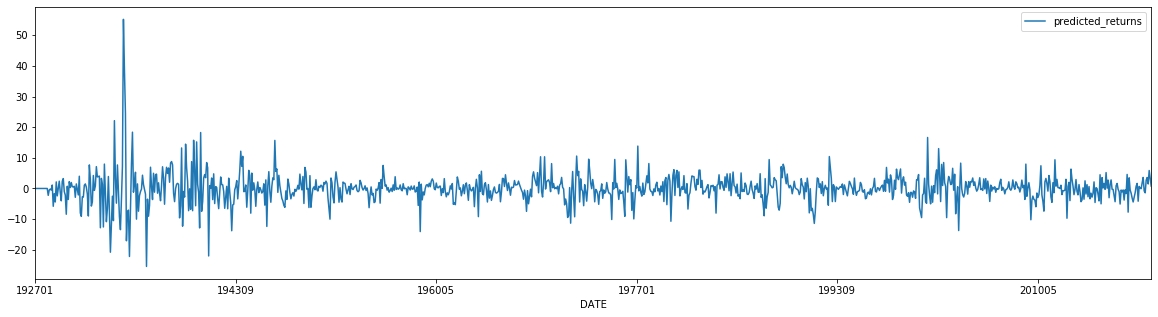

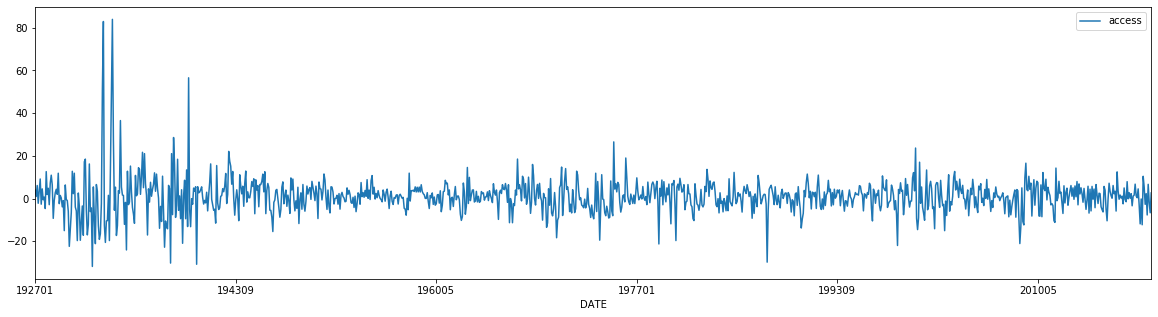

In [0]:
# Graphing
factor_df['predicted_returns']
factor_df.plot('DATE','predicted_returns',figsize=(20,5))
factor_df.plot('DATE','access',figsize=(20,5))
factor_df